Full bytes with CRC:
0x8d 0x40 0x6b 0x90 0x20 0x15 0xa6 0x78 0xd4 0xd2 0x20 0xaa 0x4b 0xda 

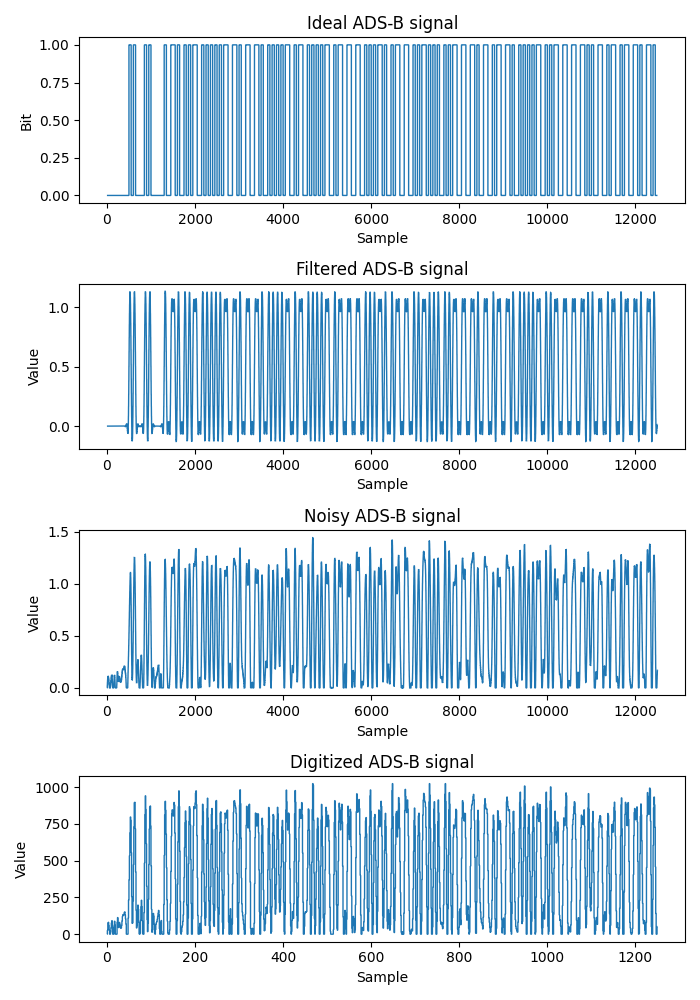

In [2]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from preambules_list import Preambule, preambule_list
from Functions.signal_generator import generate_ADSB, digitize_signal, correlate_signals
from Functions.crc import generate_adsb_crc

#Configuration
amplitude = 1
data_bits = bytes([0x8D, 0x40, 0x6B, 0x90, 0x20, 0x15, 0xA6, 0x78, 0xD4, 0xD2, 0x20])

#Generate and append CRC
crc_bits = generate_adsb_crc(data_bits)
full_bits = data_bits + crc_bits
print("Full bytes with CRC:")
for i in full_bits:
    print(hex(i) + " ", end='')

#Generate and plot simulated ADS-B
ideal_signal, filtered_signal, noisy_signal = generate_ADSB(amplitude, full_bits)
#Digitize signal
digitized_signal, digitized_t = digitize_signal(noisy_signal, 100E6, 10E6, 1.4, 2**10)

plt.figure(figsize=(7, 10))
plt.subplot(411)
plt.stairs(ideal_signal, baseline=None)
plt.xlabel('Sample')
plt.ylabel('Bit')
plt.title('Ideal ADS-B signal')

plt.subplot(412)
plt.stairs(filtered_signal, baseline=None)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Filtered ADS-B signal')

plt.subplot(413)
plt.stairs(noisy_signal, baseline=None)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Noisy ADS-B signal')

plt.subplot(414)
plt.stairs(digitized_signal, baseline=None)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Digitized ADS-B signal')
plt.tight_layout()
plt.show()


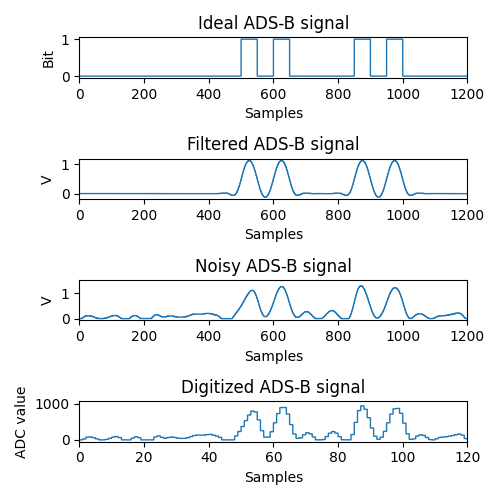

In [3]:
plt.figure(figsize=(5, 5))
plt.subplot(411)
plt.stairs(ideal_signal, baseline=None)
plt.xlabel('Samples')
plt.ylabel('Bit')
plt.title('Ideal ADS-B signal')
plt.xlim([0, 1200])
plt.subplot(412)
plt.stairs(filtered_signal, baseline=None)
plt.xlabel('Samples')
plt.ylabel('V')
plt.title('Filtered ADS-B signal')
plt.xlim([0, 1200])
plt.subplot(413)
plt.stairs(noisy_signal, baseline=None)
plt.xlabel('Samples')
plt.ylabel('V')
plt.title('Noisy ADS-B signal')
plt.xlim([0, 1200])
plt.subplot(414)
plt.stairs(digitized_signal, baseline=None)
plt.xlabel('Samples')
plt.ylabel('ADC value')
plt.title('Digitized ADS-B signal')
plt.xlim([0, 120])
plt.tight_layout()
plt.show()

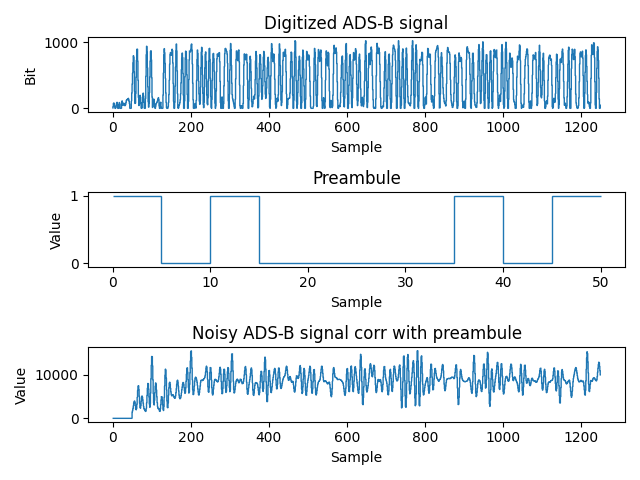

In [4]:
preamble = preambule_list[Preambule.Ideal.value]

preambule_corr = correlate_signals(digitized_signal, preamble.get_coefficients())

plt.figure()
plt.subplot(3, 1, 1)
plt.stairs(digitized_signal, baseline=None)
plt.xlabel('Sample')
plt.ylabel('Bit')
plt.title('Digitized ADS-B signal')

plt.subplot(3, 1, 2)
plt.stairs(preamble.get_coefficients(), baseline=None)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Preambule')

plt.subplot(3, 1, 3)
plt.stairs(preambule_corr, baseline=None)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Noisy ADS-B signal corr with preambule')
plt.tight_layout()
plt.show()

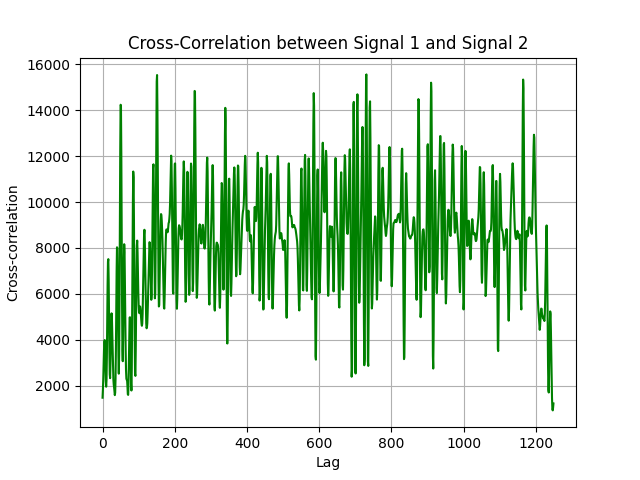

In [5]:
test_signal = digitized_signal
test_mask = np.concatenate((preamble.get_coefficients(), np.zeros(len(test_signal) - len(preamble.get_coefficients()))))

fft_signal = np.fft.fft(test_signal)
fft_replica_conj = np.conj(np.fft.fft(test_mask))

cpsd = fft_signal * fft_replica_conj
cross_corr = np.fft.ifft(cpsd)

plt.figure()
plt.plot(np.real(cross_corr), label='Cross-correlation (x, y)', color='green')
plt.title('Cross-Correlation between Signal 1 and Signal 2')
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.grid(True)
plt.show()